In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'

In [22]:
df = pd.read_csv("./data.csv", header=None)
df

,0,1,2,3
0,native,8,3.961000e+01,4.263779e+02
1,native_with_size_hint,8,3.959000e+01,3.631619e+02
2,simd_f32x8,8,3.760000e+01,1.167800e+02
3,native_par,8,1.138808e+05,8.264878e+10
4,native,16,7.515000e+01,4.885275e+02
...,...,...,...,...
2053,native,130560000,4.241428e+08,2.629928e+12
2054,native_with_size_hint,130560000,4.234554e+08,5.103475e+11
2055,simd_f32x8,130560000,1.483888e+08,1.345955e+14
2056,simd_f32x16,130560000,1.419414e+08,8.369009e+12


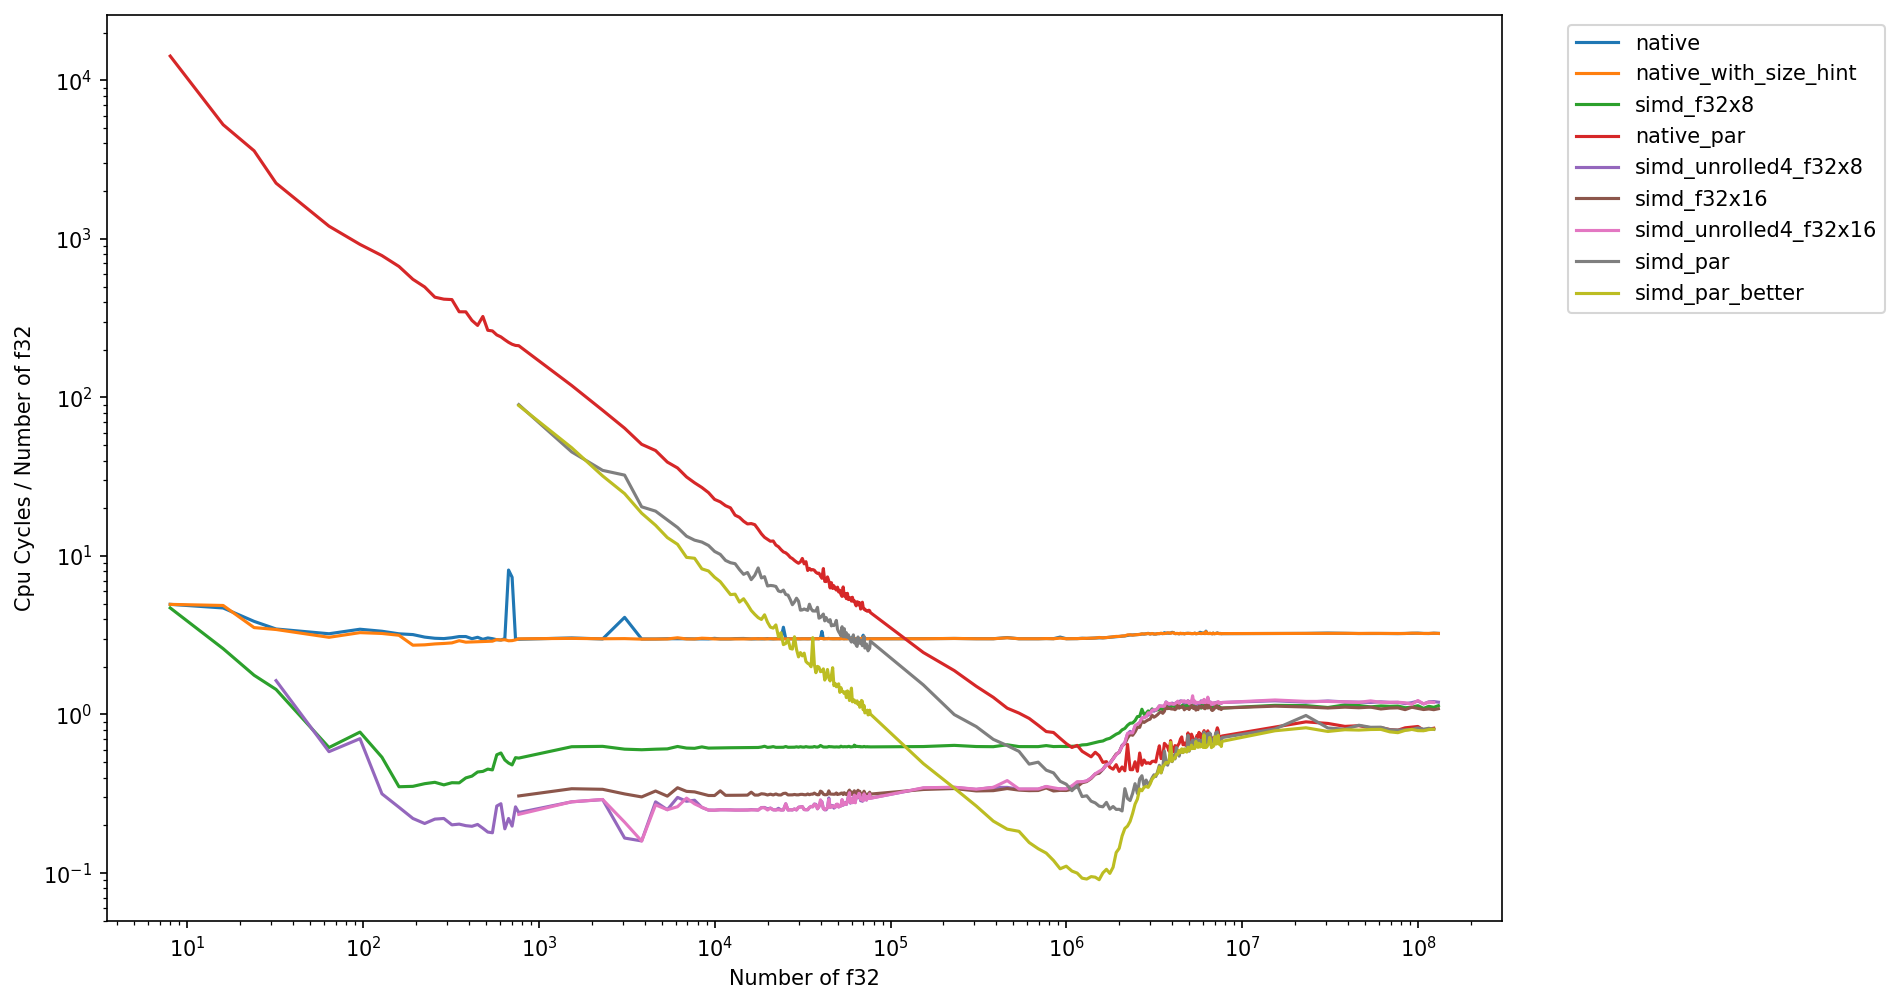

In [23]:
plt.figure(figsize=(12, 8), dpi=150, facecolor='white')
for name in df[0].unique():
    data = df[df[0] == name]
    
    x = data[1].sort_values()
    y = data[2][x.index]
    
    plt.plot(
        x,
        y / x,
        label=name
    )
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Cpu Cycles / Number of f32")
plt.xlabel("Number of f32")
plt.savefig("benchmarks.png")
plt.show()